# The Discrimination of Visual Number 2022 - Workflow

In [90]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sb

In my project, I've used data collected by myself.
I've collected 236 Answers to my survey resulting in 86 Valid answers.

In [91]:
results0 = pd.read_csv("results-survey693479.csv")

In [92]:
results = results0.iloc[:, 0:79].dropna()

The study consisted of 70 answers veryfing the accuracy and the certainty of numerousness estimation of a visual objects.

In [93]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 1 to 230
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             89 non-null     int64  
 1   submitdate     89 non-null     object 
 2   lastpage       89 non-null     float64
 3   startlanguage  89 non-null     object 
 4   seed           89 non-null     int64  
 5   wiek           89 non-null     float64
 6   plec           89 non-null     object 
 7   G99Q99         89 non-null     object 
 8   G00Q00         89 non-null     float64
 9   G00Q01         89 non-null     float64
 10  G01Q00         89 non-null     float64
 11  G01Q01         89 non-null     float64
 12  G02Q00         89 non-null     float64
 13  G02Q01         89 non-null     float64
 14  G03Q00         89 non-null     float64
 15  G03Q01         89 non-null     float64
 16  G04Q00         89 non-null     float64
 17  G04Q01         89 non-null     float64
 18  G05Q00     

In [94]:
results = results.drop([126])
results = results.drop([98])
results = results.drop([13])

In [95]:
results.describe()

,id,lastpage,seed,wiek,G00Q00,G00Q01,G01Q00,G01Q01,G02Q00,G02Q01,...,G134Q01,G152Q00,G152Q01,G170Q00,G170Q01,G191Q00,G191Q01,G210Q00,G210Q01,interviewtime
count,86.000000,86.0,8.600000e+01,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,...,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,124.918605,37.0,1.005723e+09,36.290698,1.011628,7.500000,2.034884,9.302326,3.046512,9.395349,...,3.697674,85.465116,4.046512,96.651163,3.965116,108.488372,3.906977,107.337209,3.965116,584.090814
std,64.300620,0.0,6.403080e+08,117.566689,0.583986,3.245812,0.184561,1.970785,0.261533,1.536069,...,2.114765,42.950230,2.340975,69.352428,2.323525,73.115339,2.428400,59.874695,2.203995,293.367770
min,2.000000,37.0,8.680745e+06,14.000000,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,389.480000
25%,81.250000,37.0,4.670858e+08,19.000000,1.000000,6.000000,2.000000,10.000000,3.000000,10.000000,...,2.000000,52.500000,2.000000,58.500000,2.000000,60.000000,2.000000,70.000000,2.000000,454.632500
50%,123.000000,37.0,9.842916e+08,20.000000,1.000000,9.000000,2.000000,10.000000,3.000000,10.000000,...,4.000000,75.500000,4.000000,84.500000,4.000000,99.500000,4.000000,100.000000,4.000000,509.080000
75%,177.500000,37.0,1.528934e+09,23.750000,1.000000,10.000000,2.000000,10.000000,3.000000,10.000000,...,5.000000,110.000000,6.000000,111.500000,6.000000,129.500000,6.000000,124.500000,5.000000,607.682500
max,237.000000,37.0,2.147316e+09,1111.000000,5.000000,10.000000,3.000000,10.000000,4.000000,10.000000,...,8.000000,220.000000,10.000000,550.000000,10.000000,400.000000,10.000000,350.000000,9.000000,2177.750000


### Demographic Section
Here I've verified the age and a gender of study participants.
I've also created graphs used for my future presentations.

In [96]:
results.sort_values("wiek", ascending=0)
# Dwa górne wieki są nieprawidłowe

,id,submitdate,lastpage,startlanguage,seed,wiek,plec,G99Q99,G00Q00,G00Q01,...,G134Q01,G152Q00,G152Q01,G170Q00,G170Q01,G191Q00,G191Q01,G210Q00,G210Q01,interviewtime
152,157,1980-01-01 00:00:00,37.0,pl,1361525967,1111.0,mężczyzna,Zapoznałam/em się z instrukcją i używam komput...,1.0,10.0,...,4.0,60.0,6.0,50.0,5.0,0.0,0.0,70.0,6.0,404.76
124,127,1980-01-01 00:00:00,37.0,pl,1229859907,54.0,mężczyzna,Zapoznałam/em się z instrukcją i używam komput...,1.0,1.0,...,3.0,120.0,3.0,200.0,3.0,150.0,2.0,150.0,3.0,545.79
1,2,1980-01-01 00:00:00,37.0,pl,354469609,50.0,kobieta,Zapoznałam/em się z instrukcją i używam telefo...,0.0,5.0,...,2.0,140.0,2.0,170.0,2.0,160.0,2.0,140.0,3.0,818.01
85,87,1980-01-01 00:00:00,37.0,pl,271040689,50.0,mężczyzna,"Nie udało mi się włączyć ""Wersji na komputer"" ...",0.0,0.0,...,5.0,75.0,4.0,89.0,5.0,60.0,5.0,120.0,4.0,880.35
84,86,1980-01-01 00:00:00,37.0,pl,1527408253,50.0,kobieta,"Nie udało mi się włączyć ""Wersji na komputer"" ...",0.0,0.0,...,6.0,40.0,4.0,38.0,5.0,40.0,5.0,40.0,4.0,674.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,138,1980-01-01 00:00:00,37.0,pl,533791273,18.0,kobieta,Zapoznałam/em się z instrukcją i używam komput...,1.0,3.0,...,0.0,80.0,2.0,80.0,3.0,80.0,3.0,80.0,3.0,541.60
226,233,1980-01-01 00:00:00,37.0,pl,70130344,17.0,mężczyzna,Zapoznałam/em się z instrukcją i używam komput...,1.0,8.0,...,6.0,65.0,5.0,65.0,6.0,80.0,4.0,99.0,5.0,640.04
148,153,1980-01-01 00:00:00,37.0,pl,562525812,17.0,kobieta,Zapoznałam/em się z instrukcją i używam komput...,1.0,7.0,...,2.0,30.0,1.0,40.0,2.0,60.0,3.0,60.0,3.0,392.93
171,176,1980-01-01 00:00:00,37.0,pl,968666388,16.0,mężczyzna,Zapoznałam/em się z instrukcją i używam komput...,1.0,10.0,...,6.0,170.0,7.0,185.0,6.0,235.0,8.0,150.0,7.0,438.36


In [97]:
results["wiek"][results["wiek"]<100].describe()
# Podstawowe Dane dla wieku

count    85.000000
mean     23.647059
std       8.643337
min      14.000000
25%      19.000000
50%      20.000000
75%      23.000000
max      54.000000
Name: wiek, dtype: float64

In [98]:
strwiek = pd.Series([results["wiek"][(results["wiek"] <=10*i) & (results["wiek"] > 10*(i-1))].count() for i in range(2, 7)], index=["10-20", "21-30", "31-40", "41-50", "50<"])

In [99]:
strwiek

10-20    44
21-30    29
31-40     4
41-50     7
50<       1
dtype: int64

[Text(0.5, 0, 'Grupa Wiekowa'), Text(0, 0.5, 'Ilość osób')]

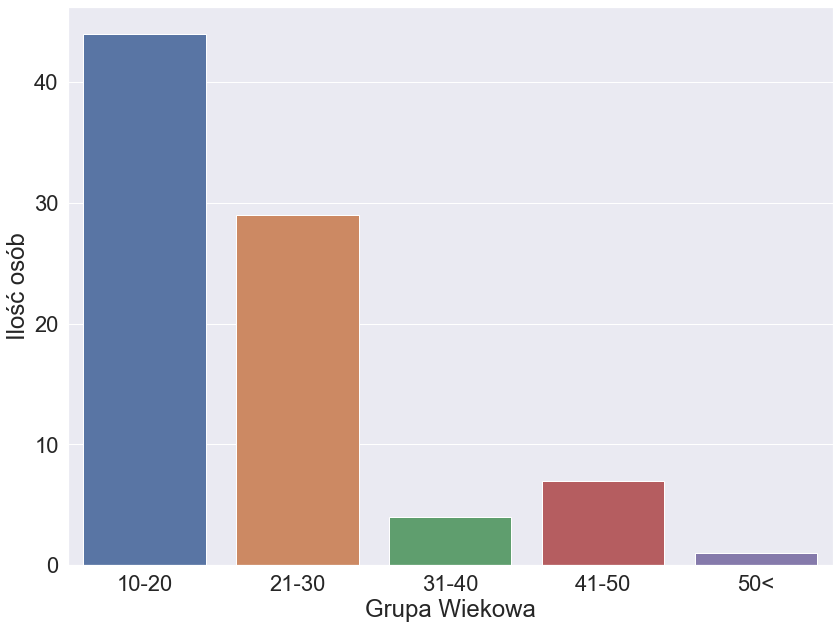

In [100]:
obrazek4 = sb.barplot(x=strwiek.index, y=strwiek)
obrazek4.set(xlabel="Grupa Wiekowa", ylabel="Ilość osób")

In [101]:
results.describe()

,id,lastpage,seed,wiek,G00Q00,G00Q01,G01Q00,G01Q01,G02Q00,G02Q01,...,G134Q01,G152Q00,G152Q01,G170Q00,G170Q01,G191Q00,G191Q01,G210Q00,G210Q01,interviewtime
count,86.000000,86.0,8.600000e+01,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,...,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,124.918605,37.0,1.005723e+09,36.290698,1.011628,7.500000,2.034884,9.302326,3.046512,9.395349,...,3.697674,85.465116,4.046512,96.651163,3.965116,108.488372,3.906977,107.337209,3.965116,584.090814
std,64.300620,0.0,6.403080e+08,117.566689,0.583986,3.245812,0.184561,1.970785,0.261533,1.536069,...,2.114765,42.950230,2.340975,69.352428,2.323525,73.115339,2.428400,59.874695,2.203995,293.367770
min,2.000000,37.0,8.680745e+06,14.000000,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,389.480000
25%,81.250000,37.0,4.670858e+08,19.000000,1.000000,6.000000,2.000000,10.000000,3.000000,10.000000,...,2.000000,52.500000,2.000000,58.500000,2.000000,60.000000,2.000000,70.000000,2.000000,454.632500
50%,123.000000,37.0,9.842916e+08,20.000000,1.000000,9.000000,2.000000,10.000000,3.000000,10.000000,...,4.000000,75.500000,4.000000,84.500000,4.000000,99.500000,4.000000,100.000000,4.000000,509.080000
75%,177.500000,37.0,1.528934e+09,23.750000,1.000000,10.000000,2.000000,10.000000,3.000000,10.000000,...,5.000000,110.000000,6.000000,111.500000,6.000000,129.500000,6.000000,124.500000,5.000000,607.682500
max,237.000000,37.0,2.147316e+09,1111.000000,5.000000,10.000000,3.000000,10.000000,4.000000,10.000000,...,8.000000,220.000000,10.000000,550.000000,10.000000,400.000000,10.000000,350.000000,9.000000,2177.750000


In [102]:
results["plec"].value_counts().index = ["Kobiety", "Mężczyźni"]
results["plec"].value_counts()
# Ilość kobiet i mężczyzn

kobieta      45
mężczyzna    41
Name: plec, dtype: int64

[Text(0.5, 0, 'Ilość osób')]

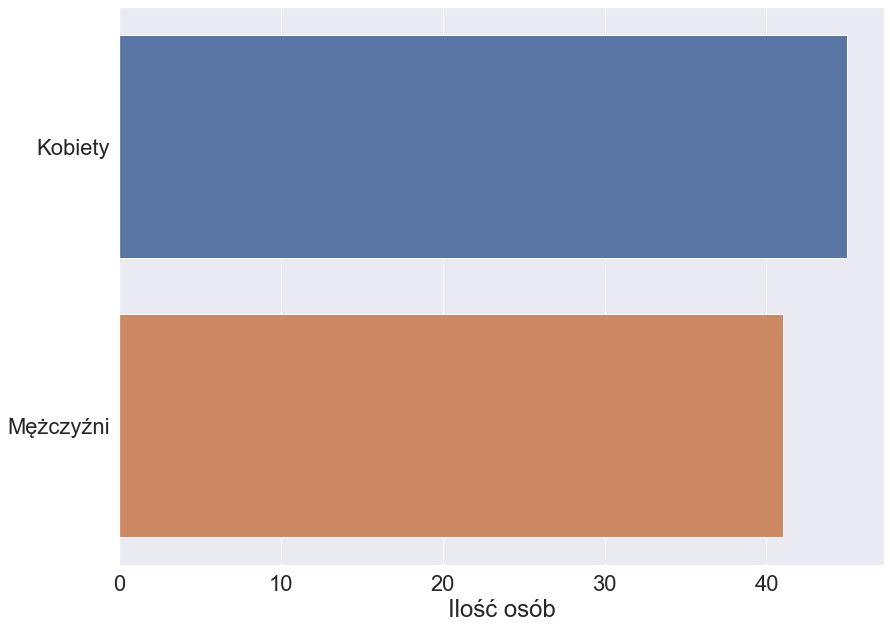

In [103]:
obrazek3 = sb.barplot(x=results["plec"].value_counts(), y=["Kobiety", "Mężczyźni"], orient="h")
obrazek3.set(xlabel="Ilość osób")


In [104]:
results["interviewtime"].describe()
#średni czas rozwiązywania zadań - 9.6 min

count      86.000000
mean      584.090814
std       293.367770
min       389.480000
25%       454.632500
50%       509.080000
75%       607.682500
max      2177.750000
Name: interviewtime, dtype: float64

### Study Results Section
Here I've gathered data veryfying our study hypothesis.

In [105]:
lol = results.iloc[:, 8:78].T

In [106]:
lol.max().sort_values().tail(10)

71     200.0
175    210.0
203    217.0
155    220.0
171    235.0
183    250.0
79     300.0
54     328.0
82     350.0
161    550.0
dtype: float64

In [107]:
indexes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 19, 22, 25, 28, 32, 37, 42, 49, 57, 66, 77, 89, 103, 118, 134, 152, 170, 191, 210]

In [108]:
numbers = lol[[i.endswith("00") for i in lol.index]]

In [109]:
certainty = lol[[i.endswith("01") for i in lol.index]]

In [110]:
scissors = pd.DataFrame([val != 0 for val in certainty.values])
scissors.index = indexes
scissors.columns = numbers.columns

In [111]:
numbers.index=indexes

In [112]:
numbers.max()[numbers.max()<=100].count()

41

In [113]:
certainty.index=indexes

In [114]:
women = certainty[scissors].mean()[results["plec"]=="kobieta"]
men = certainty[scissors].mean()[results["plec"]=="mężczyzna"]

stats.ttest_ind(women, men, alternative="less")

Ttest_indResult(statistic=-2.1699652449103906, pvalue=0.016416754709644106)

In [115]:
print(women.mean(), men.mean())

5.496928104575163 6.168833058875358


In [116]:
numdiff = pd.Series([np.absolute(numbers[scissors].loc[i]-i).mean() for i in numbers.index], indexes)

In [117]:
percerr = pd.Series([(100*np.absolute((numbers[scissors].loc[i]-i))/i).mean() for i in numbers.index], indexes)

In [118]:
E0 = percerr.loc[1:7]
E1 = percerr.loc[8:210]

In [119]:
E0.describe()

count     7.000000
mean      6.385024
std       3.683628
min       1.744186
25%       4.069767
50%       6.201550
75%       8.132109
max      12.345679
dtype: float64

In [120]:
E1.describe()

count    28.000000
mean     33.259177
std      12.063934
min      11.895425
25%      24.563728
50%      31.339272
75%      44.481817
max      52.585825
dtype: float64

In [121]:
zmienna1 = pd.DataFrame([(100*np.absolute((numbers[scissors].loc[i]-i))/i) for i in numbers.index], indexes).T

### The results confirm our hypothesis with a stuning value:
Statistic = 26
pvalue < 0.00001  (9.914402184397522e-16)


In [151]:
eos = tuple(zmienna1.loc[:, 1:7].T.mean())
eet = tuple(zmienna1.loc[:, 8:].T.mean())

stats.wilcoxon(eos, eet, alternative="less")

WilcoxonResult(statistic=26.0, pvalue=9.914402184397522e-16)

[Text(0.5, 0, 'Ilość Kropek'), Text(0, 0.5, 'Procent Błędu')]

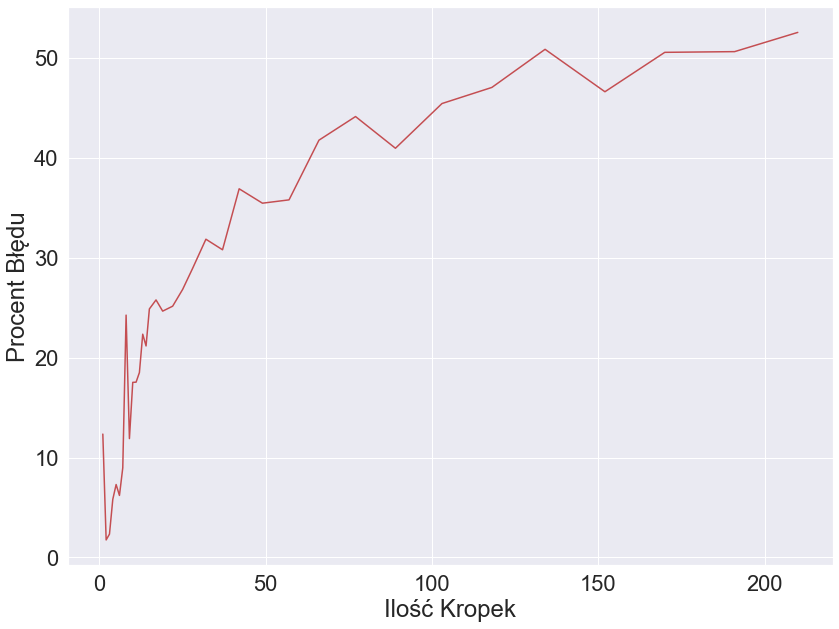

In [123]:
#percerr.plot(kind="line")
sb.set_theme(style="whitegrid", palette="pastel")
sb.set(rc={'figure.figsize':(13.7,10.27)})
sb.set(font_scale=2)
obrazek1 = sb.lineplot(x=percerr.index, y=percerr, data=percerr,color="r")
obrazek1.set(xlabel="Ilość Kropek", ylabel="Procent Błędu")


<AxesSubplot:>

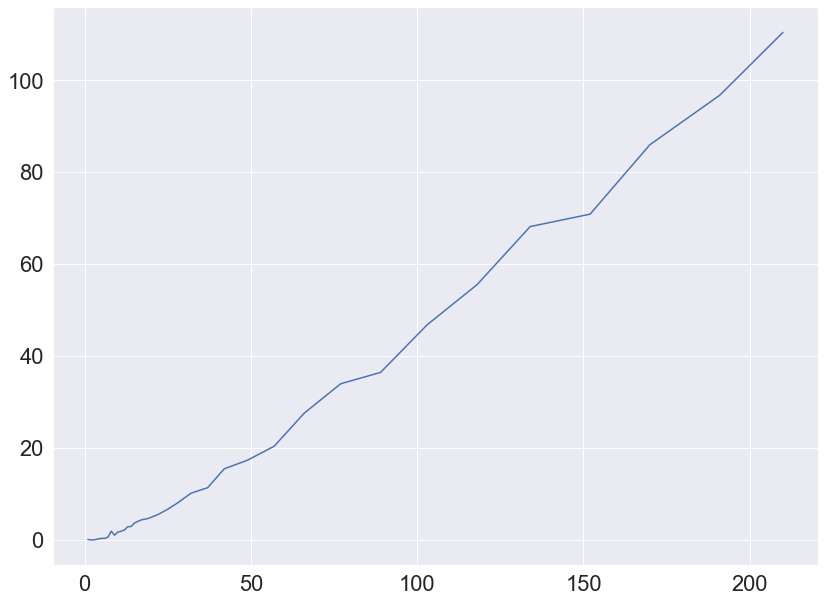

In [124]:
numdiff.plot(kind="line")

In [125]:
certmedian = certainty.T.median()

### The results confirm our 2nd hypothesis with a stuning value:
Statistic = 23
pvalue < 0.00001  (1.1415136234802116e-39)


In [150]:
cert1 = certainty[scissors].loc[1:7].mean()
cert2 = certainty[scissors].loc[8:210].mean()

stats.ttest_rel(cert1, cert2, alternative="greater")

Ttest_relResult(statistic=23.813102639789747, pvalue=1.1415136234802116e-39)

[(0.0, 15.0), (0.0, 12.0)]

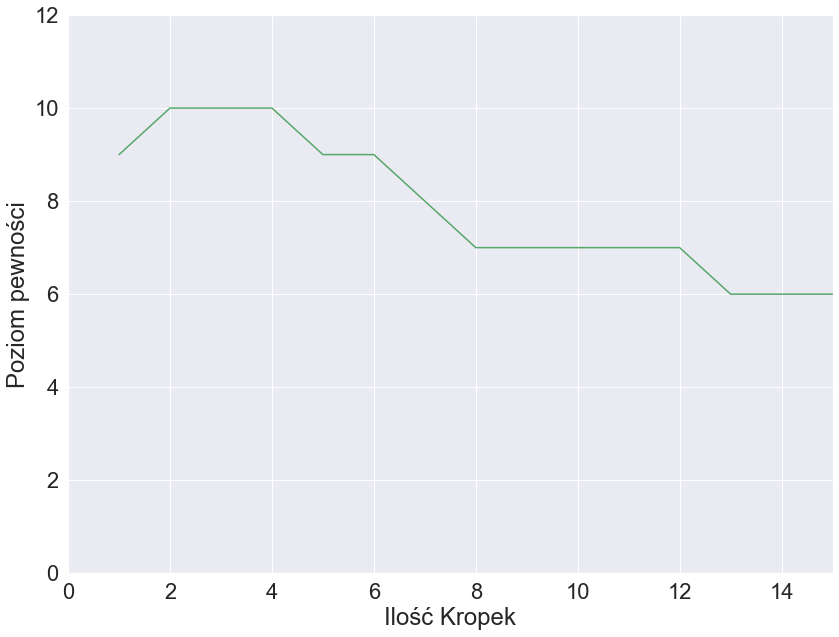

In [87]:
sb.set_context("talk")
sb.set_theme(style="whitegrid", palette="pastel")
sb.set(rc={'figure.figsize':(13.7,10.27)})
sb.set(font_scale=2)
obrazek2 = sb.lineplot(x=certmedian.index, y=certmedian, data=certmedian,color="g")
obrazek2.set(xlabel="Ilość Kropek", ylabel="Poziom pewności")
obrazek2.set(xlim=(0, 15), ylim=(0, 12))